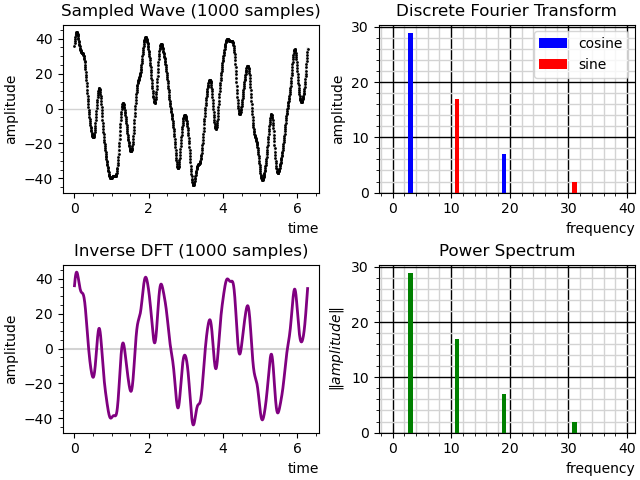

In [1]:
# fourier_discrete.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

max_freq = 40


def dft(ts, ys):
    num_samples = ts.size #size of time stamp array is the number of samples
    num_terms = int(num_samples / 2)  # Nyquist limit

    a_cos = np.zeros(num_terms) #zero arrays, amplitudes for each integer frequencies
    b_sin = np.zeros(num_terms)

    for term in range(0, num_terms): #for every term
        a = b = 0
        for sample in range(0, num_samples): #for every data point
            a += 2 * np.cos(term * ts[sample]) * ys[sample] #multiply data point by 
            #2cos(nts)
            b += 2 * np.sin(term * ts[sample]) * ys[sample]
        a_cos[term] = round(a / num_samples, 8) + 0 #take the average by dividing by 
        #number of samples. round converts to float. "+0" converts back to 0
        b_sin[term] = round(b / num_samples, 8) + 0

    a_cos[0] /= 2 #first amplitude is not supposed to be multiplied by 2
    b_sin[0] /= 2

    return a_cos, b_sin #return tuple of arrays


def idft(a_cos, b_sin, ts): #find inverse DFT
    num_terms = a_cos.size
    num_points = ts.size
    yr = np.zeros(num_points) #reconstruct y values, array of zeros to start

    for point in range(0, num_points): #for every point to reconstruct
        for term in range(0, num_terms):
            yr[point] += a_cos[term] * np.cos(term * ts[point]) + b_sin[term] * np.sin(
                term * ts[point] #reconstruct simple wave superposition
            )

    return yr #returns a filled in array


def power_spec(a_cos, b_sin):
    num_terms = a_cos.size
    ps = np.zeros(num_terms)
    for term in range(0, num_terms):
        ps[term] = np.sqrt(a_cos[term] ** 2 + b_sin[term] ** 2)
    return ps


def plot_samples(ts, ys, ax):
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    ax.plot(
        ts,
        ys,
        color="lightgray",
        marker="o",
        markerfacecolor="none",
        markersize=1,
        markeredgecolor="black",
    )

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_dft(a_cos, b_sin, ax):
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = max(np.amax(np.nonzero(a_cos)), np.amax(np.nonzero(b_sin))) + 1

    ax.bar(
        range(0, highest_freq),
        a_cos[:highest_freq],
        label="cosine",
        color="blue",
        zorder=2,
    )
    ax.bar(
        range(0, highest_freq),
        b_sin[:highest_freq],
        label="sine",
        color="red",
        zorder=2,
    )

    ax.legend(loc="best")

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_idft(ts, yr, ax):
    ax.set_title(f"Inverse DFT ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray")

    ax.plot(ts, yr, color="purple", linewidth=2)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_powerspec(ps, ax):
    ax.set_title("Power Spectrum")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel(r"$\Vert amplitude \Vert$")

    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = np.amax(np.nonzero(ps)) + 1

    ax.bar(range(0, highest_freq), ps[:highest_freq], color="green", zorder=2)

    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def analyze(file_name): #analyze() takes file_name
    samples = np.genfromtxt(file_name, delimiter=",") #constructs 2D array from text file
    #given the delimiter
    ts = samples[:, 0] #slice 2D array, for every row give first column, ts are x values
    ys = samples[:, 1] #give second column for every row

    a_cos, b_sin = dft(ts, ys) #call dft, pass in arrays we just made, 
    #return the array of amplitudes, each index represents an integer frequency
    yr = idft(a_cos, b_sin, ts) #reconstruct original data
    ps = power_spec(a_cos, b_sin) #make a power spectrum, plot based on frequencies

    plt.close("all")
    fig = plt.figure(file_name, constrained_layout=True)

    gs = fig.add_gridspec(2, 2) #make four graphs in one window

    plot_samples(ts, ys, fig.add_subplot(gs[0, 0])) #top left
    plot_dft(a_cos, b_sin, fig.add_subplot(gs[0, 1])) #top right
    plot_idft(ts, yr, fig.add_subplot(gs[1, 0])) #bottom left
    plot_powerspec(ps, fig.add_subplot(gs[1, 1])) #bottom right

    plt.show()


analyze("samples.csv") #runs analyze(), passing in previously made .csv file

In [ ]:
# Cell 2

analyze("space_signal1.csv")

In [ ]:
# Cell 3

analyze("space_signal2.csv")

In [ ]:
# Cell 4

analyze("space_signal3.csv")

In [ ]:
# Cell 5

analyze("sunspots.csv")

In [ ]:
# Cell 6

analyze("samples_decay.csv")

In [ ]:
# Cell 7

analyze("samples_square.csv")